# Çizgi Grafik;

- Zamana bağlı ve nesnelerin interneti gibi konularda üretilen verilerde bu yöntem oldukça başarılır.
- Burda kullanılan veri seti beyne bağlanan bir ciaz araçılıpı ile ordan toplanan verilerin kullanıldığı bir veri seti.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
# Çıkabilecek uyarıuları kapatmak.

import warnings

warnings.filterwarnings("ignore")

In [3]:
fmri = sns.load_dataset("fmri")
df = fmri.copy()

In [4]:
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


- Bu tür veri setlerin daha çok karşımıza çıkar ve ve yapısal olan veri türleridir.
- Zaman boyutuda olduğunda nesnelerin interneti gibi senaryolarada oldukça fazla karşımıza çıkar.

In [5]:
df.shape

(1064, 5)

In [6]:
df.dtypes

subject       object
timepoint      int64
event         object
region        object
signal       float64
dtype: object

In [7]:
df.isnull().sum()

subject      0
timepoint    0
event        0
region       0
signal       0
dtype: int64

In [8]:
df.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timepoint,1064.0,9.00000,5.479801,0.000000,4.00000,9.000000,14.000000,18.000000
signal,1064.0,0.00354,0.093930,-0.255486,-0.04607,-0.013653,0.024293,0.564985


Burda sinyallerin durumlarındaki anormallikler ve bunların saptanması gibi bir işlem üzerinden işlem yapılmaktadır.

In [9]:
# Şimid burda amacımız hez bir zaman durumuna göre gözlem yapmak olsun.

df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [11]:
# Şimidi gelen sinyal durmlarının değişkenini gözlemleyelim.

df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [12]:
# Şimidi burda gelen sinyallerin belli bir düzen ile geldiğini ve bunların mekanik bir oluşum içinde olduğuna dair bir gözlem yapalım.


df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [13]:
# Zaman durumlarına göre betimsel istatiksel durumları ele alalım.

df.groupby("timepoint")["signal"].describe()

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


## Çizgi grafiğ oluştuma ve çaprazlanması.

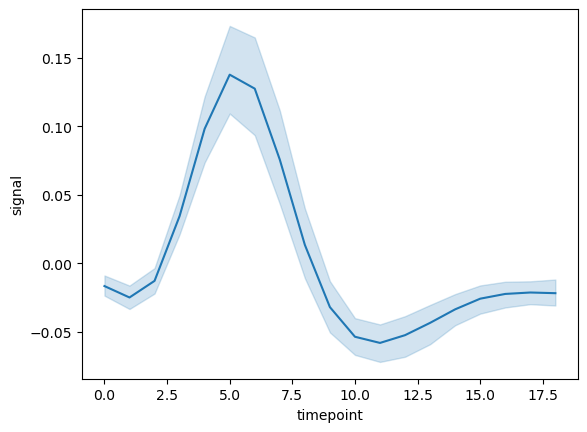

In [14]:
sns.lineplot(x = "timepoint", y = "signal", data = df);

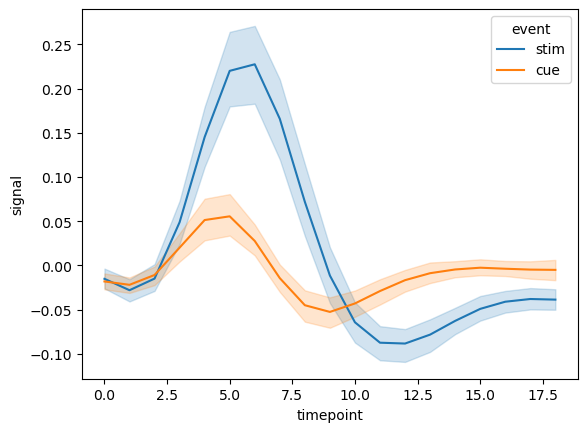

In [15]:
# üçüncü boyut ekleyelim.

sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

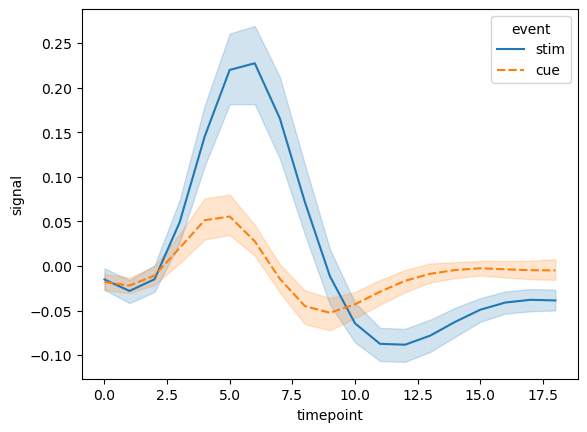

In [16]:
# Bu grafiğe bir style ekleyelim.

sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event", data = df);

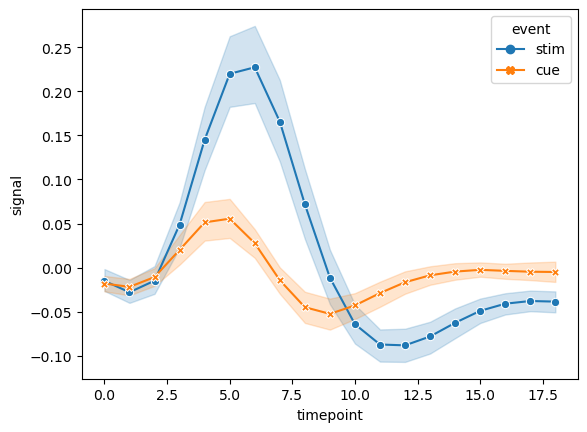

In [17]:
# Grafikleri noktaları sayısal değer olarak ifade edelim.

sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);

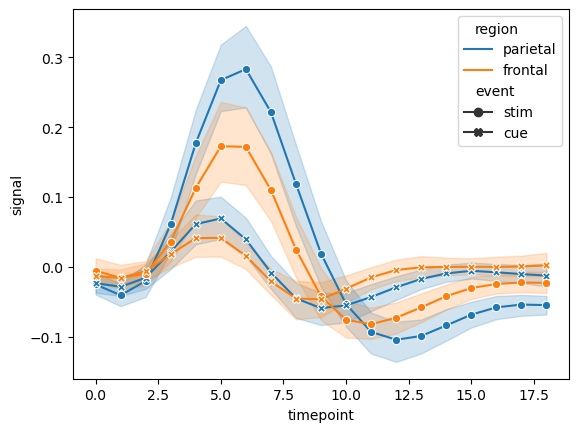

In [18]:
# Bir boyut daha ekleleyim.

sns.lineplot(x = "timepoint", 
             y = "signal", 
             hue = "region", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);

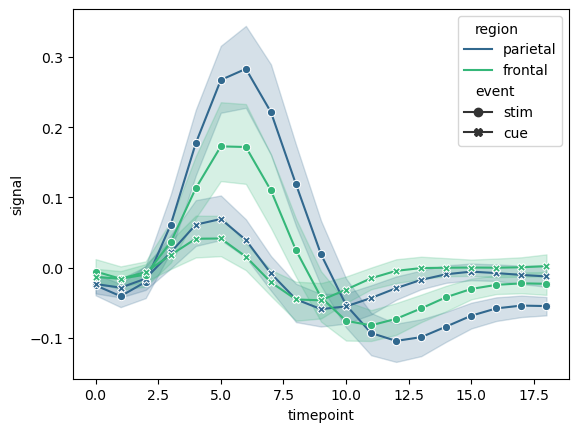

In [20]:
# Görsel olarak daha farklı vbir yapıda olması için.

sns.lineplot(x="timepoint", y="signal", hue="region", style="event",
             markers=True, dashes=False, data=df, palette="viridis");

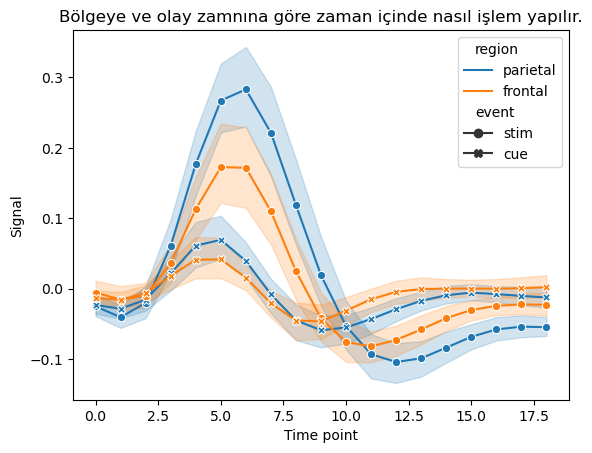

In [26]:
# Başlık ve eksen ekelemeye yönelik işlem yapılırsa.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = True, dashes = False, data = df);

plt.title("Bölgeye ve olay zamnına göre zaman içinde nasıl işlem yapılır.")
plt.xlabel("Time point")
plt.ylabel("Signal");

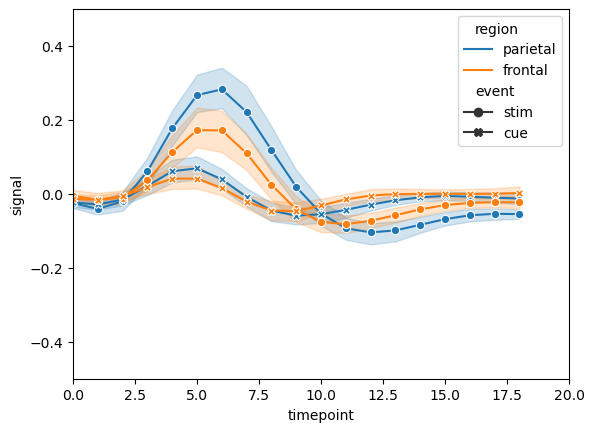

In [36]:
# Eksen aralıklarını vererek işlem yapma.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = True, dashes = False, data = df);
plt.xlim(0, 20)
plt.ylim(-0.5, +0.5);

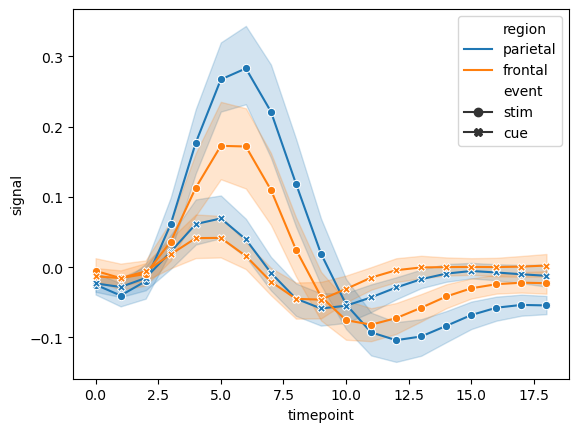

In [38]:
# Legend konumunu değiştirerek daha anlaşılır ya da okunaklı grafikler oluşturabilir.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = True, dashes = False, data = df);
plt.legend(loc = "upper right"); 

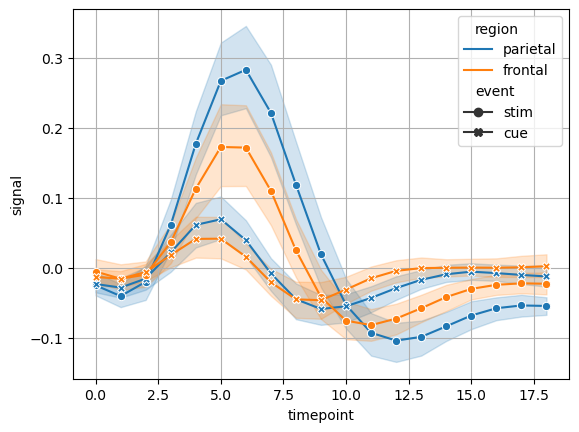

In [42]:
# Grafiğe ızgara ekleme.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = True, dashes = False, data = df);
plt.grid(True);

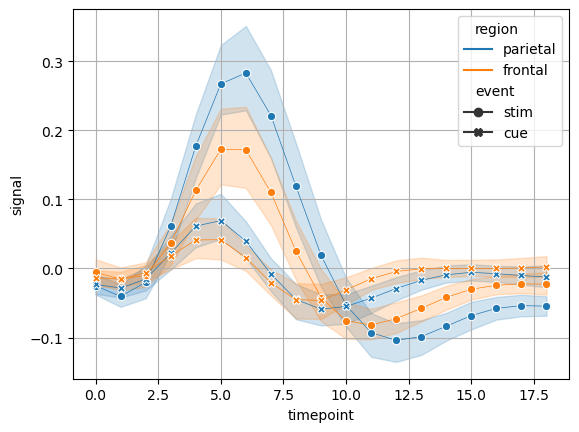

In [47]:
# Çizgi kalınlığı ve sitil ayarlama.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = True, dashes = False, data = df, linewidth = 0.5);
plt.grid(True);

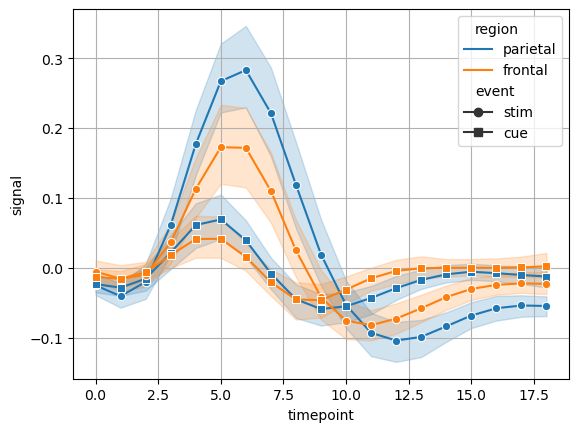

In [50]:
# farklı marker tipleri kullanma.

sns.lineplot(x = "timepoint", y = "signal", hue = "region", style = "event",
            markers = ['o','s','d','^'], dashes = False, data = df);

plt.grid(True);